In [1]:
import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

In [2]:
# your code here
df = pd.read_csv('./fifa.csv')
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0


### 1.2) Convert the `'Release Clause'` values from Euros to dollars

The `'Release Clause'` variable contains prices denominated in Euros. Use the exchange rate `1 Euro = 1.2 Dollars` to convert the prices to dollars. 

In [3]:
df['Release Clause'] = df['Release Clause']*1.2
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,271800.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,152520.0


### 1.3) Drop rows from `df` with missing values for the `'Release Clause'` feature.
    
Make sure that `df` remains the name of the dataset with the dropped rows.

In [4]:
# your code here
df.dropna(subset= ['Release Clause'], inplace= True)

In [5]:
df['Release Clause'].isnull().value_counts()  # no Null values

False    16643
Name: Release Clause, dtype: int64

### 1.4) Create a list `top_10_countries` containing the names of the 10 countries with the most players (using the `'Nationality'` column).

Hint: Your answer should include England, Germany, Spain, France, and Argentina

In [21]:
top_10_countries = list(df.groupby('Nationality')['Nationality'].count().sort_values(ascending = False)[:10].index)
top_10_countries

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

## Part 2: Data Visualization [Suggested Time: 20 minutes]
This part uses the same FIFA dataset, and asks you to plot data using `matplotlib`.

In [35]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 2.1) Create a matplotlib figure `player_count_figure` containing a labeled bar chart with the number of players from England, Germany, Spain, France, and Argentina

Use the strings provided below (`bar_chart_title`, `bar_chart_count_label`, and `bar_chart_series_label`) to title and label your bar chart. 

Hint: These are the countries with the top 5 numbers of players, so you may be able to adapt some of the code you used for question 1.4. If you were unable to complete 1.4, use the following values:

```
Country Name  | Num Players
============  | ===========
England       | 1000
Germany       | 900
Spain         | 800
France        | 700
Argentina     | 600
```

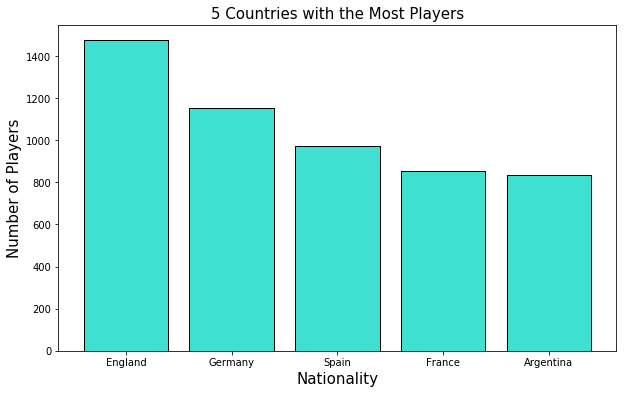

In [36]:
bar_chart_countries = ['England', 'Germany', 'Spain', 'France', 'Argentina']

bar_chart_title = '5 Countries with the Most Players'
bar_chart_count_label = 'Number of Players'
bar_chart_series_label = 'Nationality'

player_count_figure, ax =plt.subplots(figsize=(10,6))
top_5_countries = df.groupby('Nationality')['Nationality'].count().sort_values(ascending = False)[:5]
x = top_5_countries.index
y = top_5_countries.values
ax.bar(x, y, color='turquoise', edgecolor= 'black', align='center')
ax.set_title(bar_chart_title, size =15)
ax.set_xlabel(bar_chart_series_label, size=15)
ax.set_ylabel(bar_chart_count_label, size=15)
plt.show()

### 2.2) Create a matplotlib figure `tackle_figure` containing a labeled scatter plot visualizing the relationship between `StandingTackle` (on X axis) and `SlidingTackle` (on Y axis)

Use the strings provided below (`scatter_plot_title`, `standing_tackle_label`, and `sliding_tackle_label`) to title and label your scatter plot. 

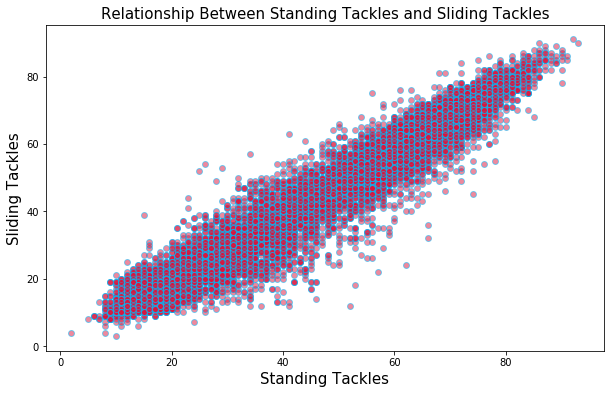

In [75]:
scatter_plot_title = 'Relationship Between Standing Tackles and Sliding Tackles'
standing_tackle_label = 'Standing Tackles'
sliding_tackle_label = 'Sliding Tackles'

tackle_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.StandingTackle,df.SlidingTackle, c = 'crimson', alpha = 0.5, edgecolor = 'deepskyblue')
ax.set_xlabel(standing_tackle_label,size =15)
ax.set_ylabel(sliding_tackle_label,size =15)
ax.set_title(scatter_plot_title,size =15)
plt.show()

## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
This part does some exploratory analysis using the same FIFA dataset.

### 3.1) Create numeric variables `mean_age` and `median_age` containing the mean and median player ages (respectively).

In [55]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

### 3.2) Create numeric variables `oldest_argentine_name` and `oldest_argentine_age` containing the name and age (respectively) of the oldest player with Argentina nationality.

In [66]:
oldest_argentine_name = df[df.Nationality=='Argentina'].sort_values(by='Age').iloc[-1:]['Name'].iloc[0]     # df[df['Nationality']=='Argentina'].sort_values(by='Age').iloc[-1]['Name']
oldest_argentine_age = df[df.Nationality=='Argentina'].sort_values(by='Age').iloc[-1:]['Age'].iloc[0]       # df[df['Nationality']=='Argentina'].sort_values(by='Age').iloc[-1]['Age']

print(oldest_argentine_name)
print(oldest_argentine_age)

C. Muñoz
41


## Part 4: Python Data Structures [Suggested Time: 20 min]

Below is a dictionary `players` with information about soccer players. The keys are player names and the values are dictionaries containing each player's age, nationality, and a list of teams they have played for.

In [68]:
# Run this cell

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a list `player_names` of all the player names in dictionary `players`. 

In [69]:
player_names = list(players.keys())
player_names

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']

### 4.2) Create a list of tuples `player_nationalities` containing each player's name along with their nationality.

In [70]:
player_nationalities = [(name,info['nationality']) for name,info in players.items()]
player_nationalities

[('L. Messi', 'Argentina'),
 ('Cristiano Ronaldo', 'Portugal'),
 ('Neymar Jr', 'Brazil'),
 ('De Gea', 'Spain'),
 ('K. De Bruyne', 'Belgium')]

### 4.3) Define a function `get_players_on_team()` that returns a list of names of all the players who have played on a given team.

Your function should take two arguments:

- A dictionary of player information
- A string containing a team name (for which you are trying to find the player names)

In [71]:
def get_players_on_team(player_dict, team_name):
    player_list = []
    for player,info in players.items():
        if team_name in info['teams']:
            player_list.append(player)
    return player_list

In [72]:
get_players_on_team(players,'Barcelona')

['L. Messi', 'Neymar Jr']